https://classroom.github.com/a/4PkesR9F



# Data Aquistion and Initial Exploration

Discussion at bottom of our code

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv("https://richardson.byu.edu/220/spotify_train.csv")
test = pd.read_csv("https://richardson.byu.edu/220/spotify_test.csv")
train.head()

,popularity,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,91,200040,False,0.514,0.730,-5.934,0.0598,0.00146,0.000095,0.0897,0.3340,171.005
1,83,177391,False,0.860,0.541,-6.510,0.0325,0.16500,0.163000,0.0663,0.9520,114.984
2,77,206060,False,0.796,0.572,-7.030,0.0545,0.41600,0.000025,0.0975,0.3040,98.967
3,74,191868,False,0.724,0.618,-9.007,0.0534,0.05330,0.704000,0.0886,0.0683,100.021
4,73,298986,False,0.662,0.400,-11.200,0.0548,0.73500,0.000017,0.0863,0.6170,79.972


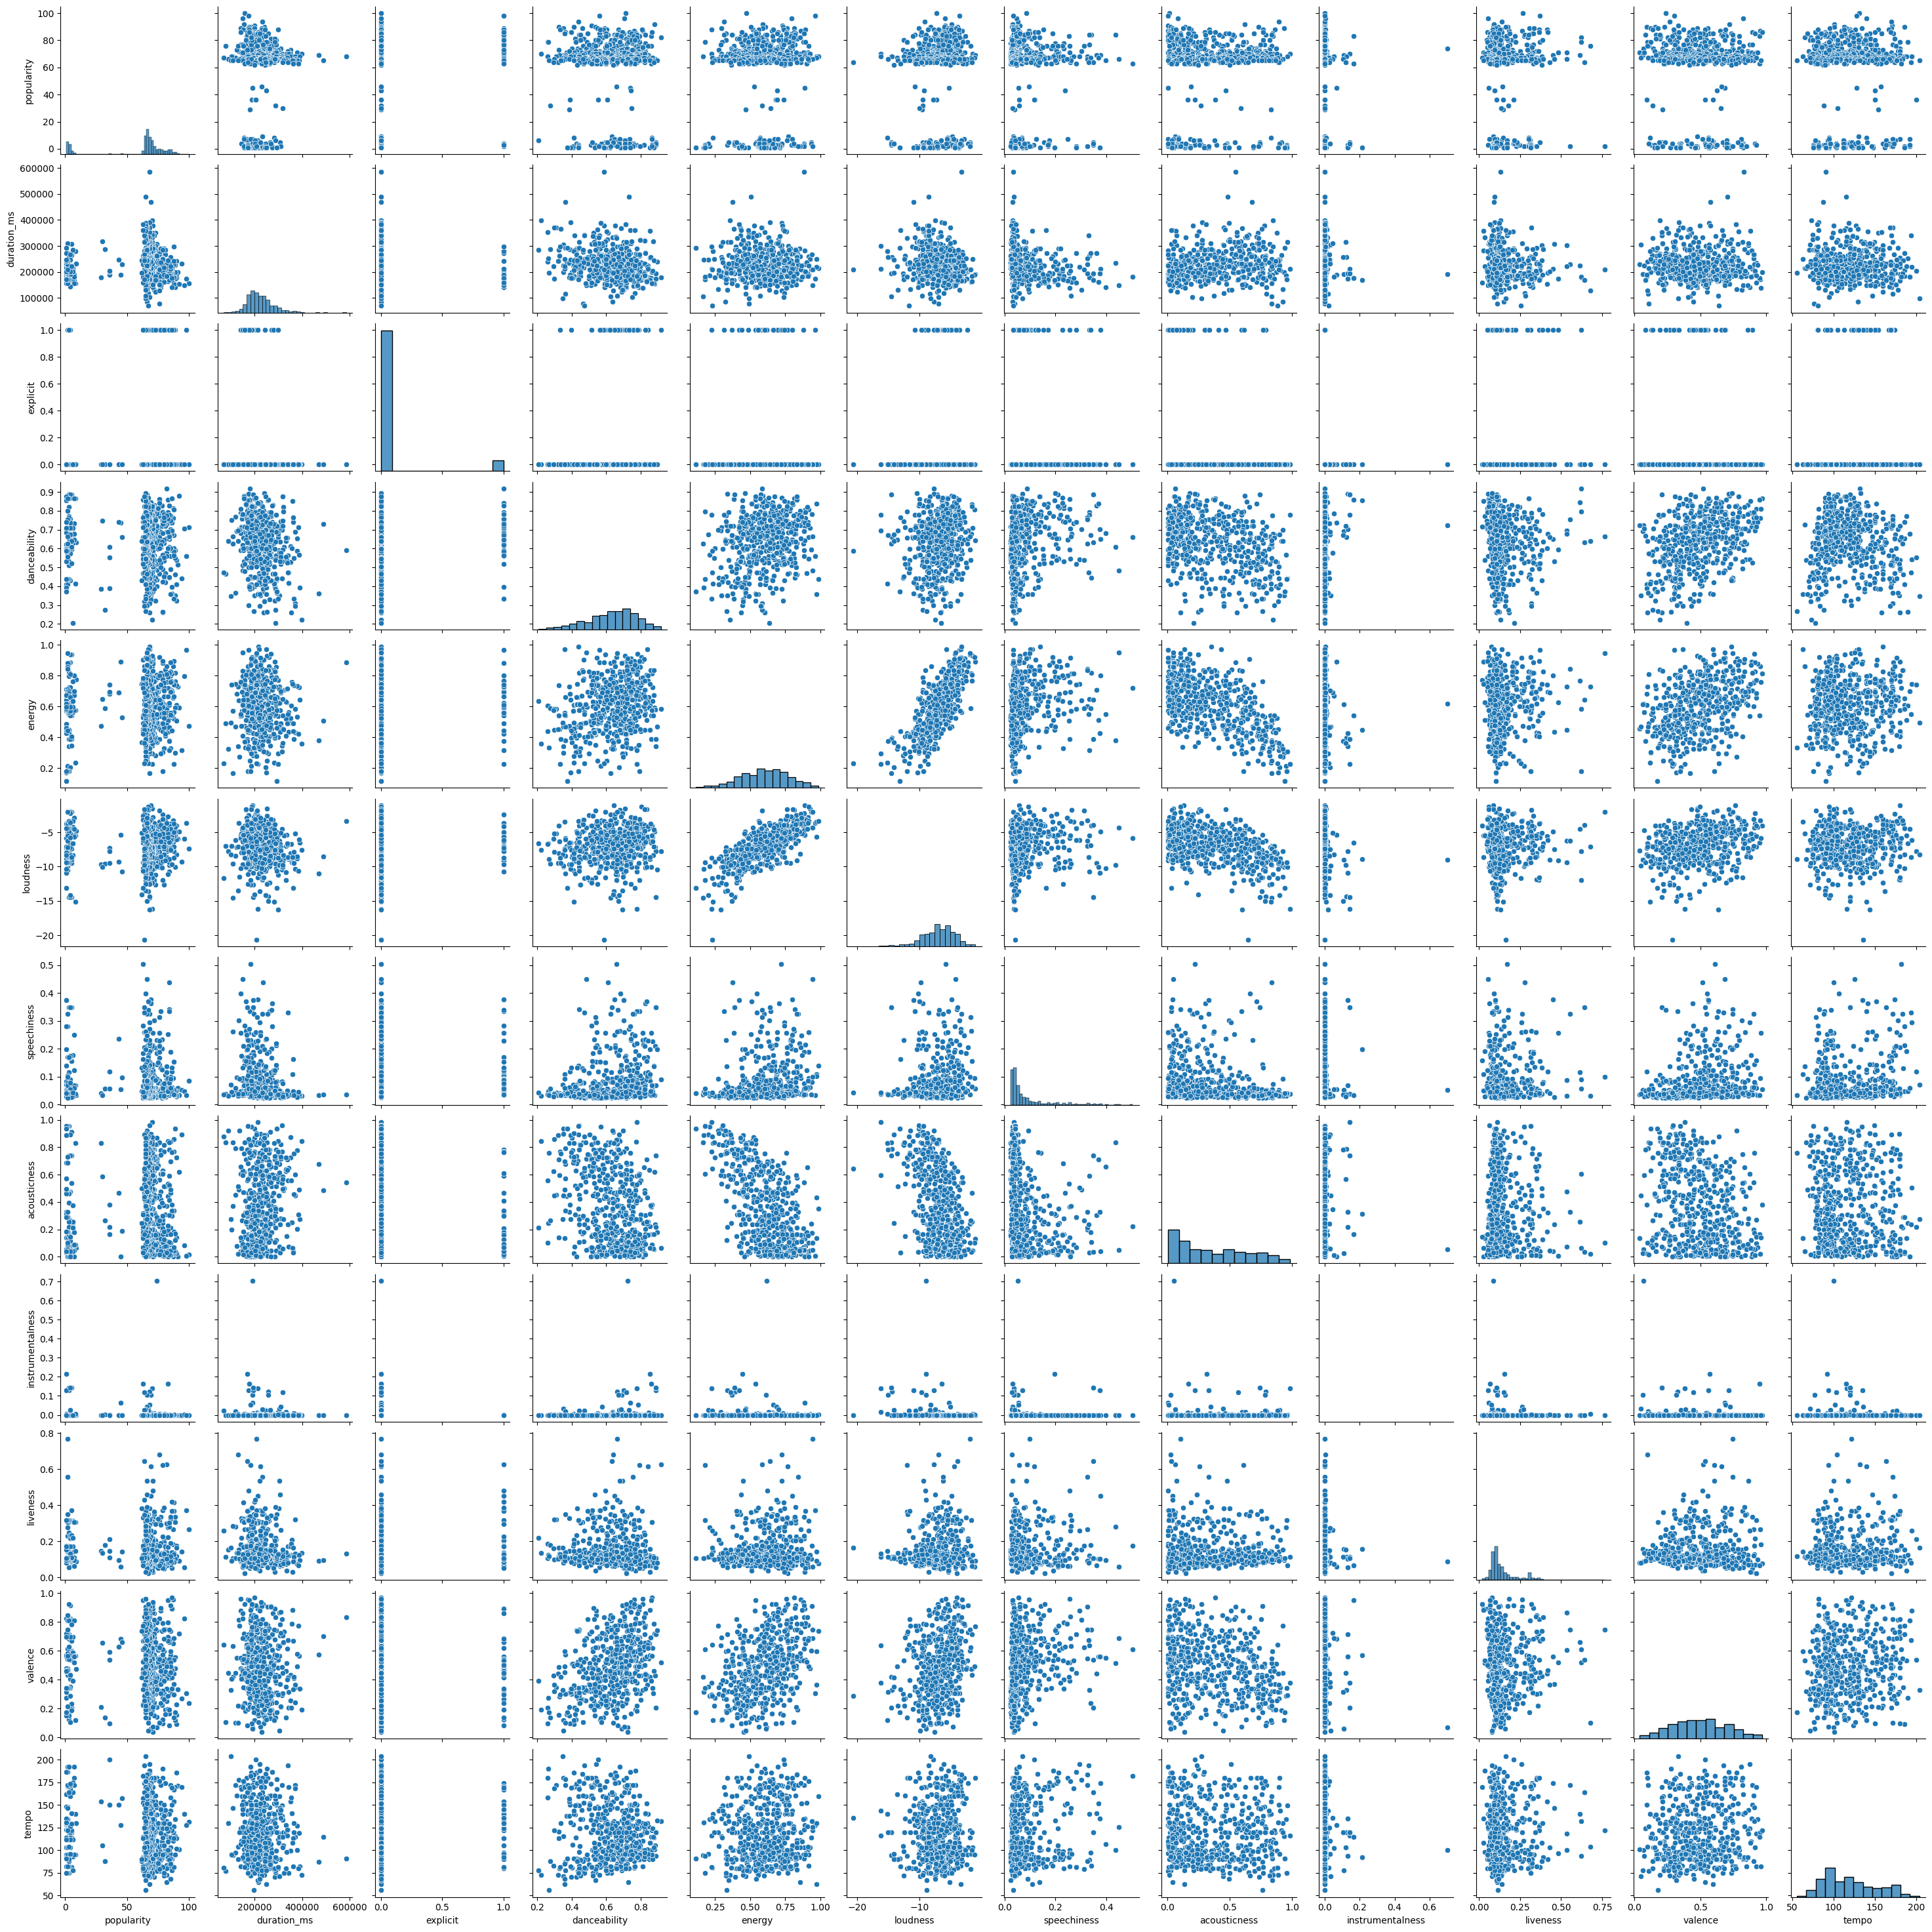

In [ ]:
sns.pairplot(train)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        576 non-null    int64  
 1   duration_ms       576 non-null    int64  
 2   explicit          576 non-null    bool   
 3   danceability      576 non-null    float64
 4   energy            576 non-null    float64
 5   loudness          576 non-null    float64
 6   speechiness       576 non-null    float64
 7   acousticness      576 non-null    float64
 8   instrumentalness  576 non-null    float64
 9   liveness          576 non-null    float64
 10  valence           576 non-null    float64
 11  tempo             576 non-null    float64
dtypes: bool(1), float64(9), int64(2)
memory usage: 50.2 KB


In [ ]:
train.describe()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,58.857639,223895.543403,0.632976,0.600602,-7.029469,0.082589,0.361682,0.005509,0.154332,0.493914,120.086938
std,27.235537,57855.209738,0.140091,0.169419,2.618035,0.080071,0.279210,0.036735,0.102761,0.207278,31.778089
min,1.000000,69741.000000,0.206000,0.114000,-20.647000,0.023200,0.001110,0.000000,0.021100,0.038300,55.832000
25%,65.000000,184318.500000,0.541000,0.481750,-8.616500,0.035675,0.109000,0.000000,0.093600,0.335000,94.052750
50%,67.000000,214600.500000,0.649500,0.609500,-6.908000,0.049100,0.300500,0.000000,0.114000,0.491500,114.986500
75%,73.000000,252733.750000,0.732250,0.723000,-5.194000,0.086975,0.594500,0.000028,0.172250,0.644750,143.988000
max,100.000000,586075.000000,0.918000,0.986000,-1.100000,0.505000,0.983000,0.704000,0.766000,0.969000,203.983000


In [ ]:
train.corr()["popularity"]

,popularity
popularity,1.000000
duration_ms,0.110246
explicit,0.095488
danceability,-0.044556
energy,0.063967
loudness,0.029331
speechiness,-0.047047
acousticness,0.051022
instrumentalness,-0.065033
liveness,-0.045313


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
scaler = StandardScaler()
scaler.fit(train)
train_normed = scaler.transform(train)
test_normed = scaler.transform(test)

<Axes: >

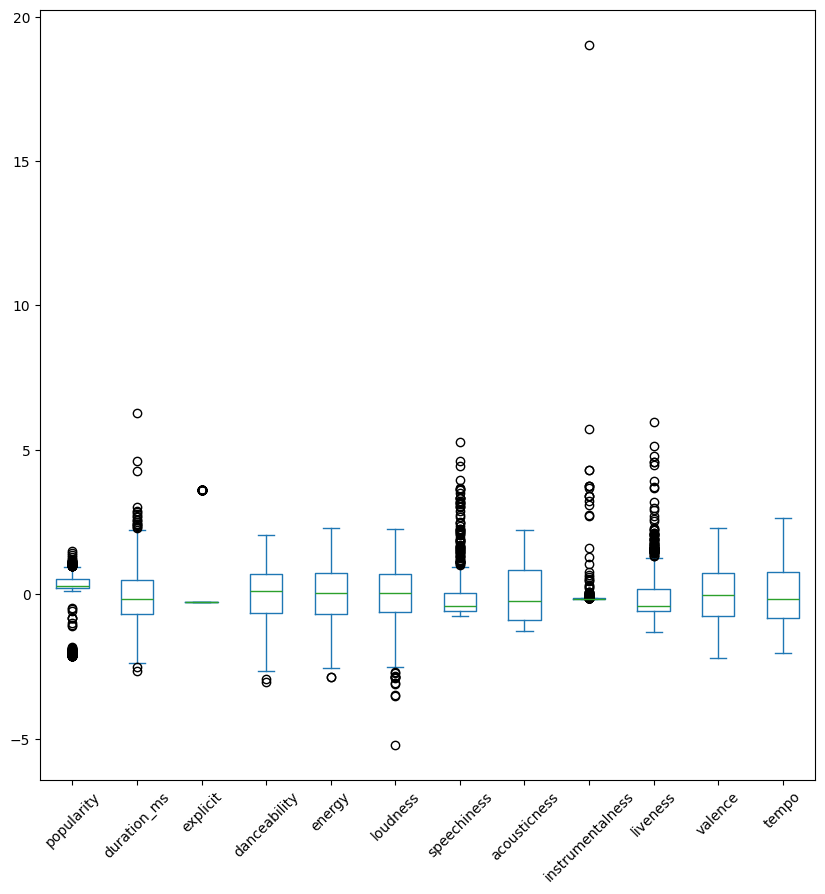

In [ ]:
## Look at different plots to see them

pd.DataFrame(train_normed, columns = train.columns).plot(kind = "box", rot = 45, figsize = (10,10))

# Regression Analysis

# Part 1: Data Prep and intial Model

### Part 1 A

In [ ]:
train["log_popularity"] = np.log(train["popularity"])
train["sqrt_popularity"] = np.sqrt(train["popularity"])
train["inv_popularity"] = 1/train["popularity"]
train.head(1)

,popularity,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,log_popularity,sqrt_popularity,inv_popularity
0,91,200040,False,0.514,0.73,-5.934,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4.51086,9.539392,0.010989


In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score


In [ ]:
train.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'log_popularity', 'sqrt_popularity',
       'inv_popularity'],
      dtype='object')

In [ ]:
for target in ["popularity", "log_popularity", "sqrt_popularity", "inv_popularity"]:
  formula =  target + " ~ acousticness + danceability + duration_ms + energy + instrumentalness  + liveness + loudness + speechiness + tempo  + valence"

  part1_mod = smf.ols(formula = formula, data = train)
  print(f"R2 score for {target} is {r2_score(train[target], part1_mod.fit().predict(train))}")

R2 score for popularity is 0.05700539840894203
R2 score for log_popularity is 0.06904145132471262
R2 score for sqrt_popularity is 0.06508770531677532
R2 score for inv_popularity is 0.055367123974656374


##### Results
The log_popularity has the best results meaning that the model explains about 7% of the data and variation of the popularity loged.

### Part 1 b

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
base_features = train.columns.drop(["popularity", "log_popularity", "sqrt_popularity", "inv_popularity"])
base_labels = train["popularity"]

In [ ]:
base_model = LinearRegression()
base_model.fit(train[base_features], base_labels)
train_baseline_score = base_model.score(train[base_features], base_labels)
test_baseline_score = base_model.score(test[base_features], test["popularity"])

In [ ]:
print(f"Train Baseline Score: {train_baseline_score}")
print(f"Test Baseline Score: {test_baseline_score}")

Train Baseline Score: 0.07469952757289045
Test Baseline Score: 0.049014572631872255


# Part 2 Transformations

In [ ]:
continuous_pred = ["duration_ms", "danceability", "energy", "loudness", "speechiness", "acousticness",
                   "instrumentalness", "liveness", "valence", "tempo"]


In [ ]:
eval(f"np.log(train['duration_ms'])")

,duration_ms
0,12.206273
1,12.086112
2,12.235923
3,12.164563
4,12.608152
...,...
571,12.050880
572,12.411578
573,12.194587
574,12.665647


In [ ]:
train.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'log_popularity', 'sqrt_popularity',
       'inv_popularity'],
      dtype='object')

In [ ]:
train.isna().sum(), test.isna().sum()

(popularity          0
 duration_ms         0
 explicit            0
 danceability        0
 energy              0
 loudness            0
 speechiness         0
 acousticness        0
 instrumentalness    0
 liveness            0
 valence             0
 tempo               0
 log_popularity      0
 sqrt_popularity     0
 inv_popularity      0
 dtype: int64,
 popularity          0
 duration_ms         0
 explicit            0
 danceability        0
 energy              0
 loudness            0
 speechiness         0
 acousticness        0
 instrumentalness    0
 liveness            0
 valence             0
 tempo               0
 dtype: int64)

In [ ]:
part2_results_dict = {}
part2_mod = LinearRegression()

# Loop through features and transformations
for continuous_feature in continuous_pred:
    for transformation in ["log", "sqrt", "inv"]:
        if transformation == "log":
            train[continuous_feature + "_" + transformation] = np.log(train[continuous_feature].clip(lower=0) + 1)
            test[continuous_feature + "_" + transformation] = np.log(test[continuous_feature].clip(lower=0) + 1)
        elif transformation == "sqrt":
            train[continuous_feature + "_" + transformation] = np.sqrt(train[continuous_feature].clip(lower=0))
            test[continuous_feature + "_" + transformation] = np.sqrt(test[continuous_feature].clip(lower=0))
        elif transformation == "inv":
            train[continuous_feature + "_" + transformation] = 1 / train[continuous_feature].replace(0, 1e-10)
            test[continuous_feature + "_" + transformation] = 1 / test[continuous_feature].replace(0, 1e-10)

        # Select features and labels
        training_features = train.drop(
            columns=["popularity", "log_popularity", "sqrt_popularity", "inv_popularity", continuous_feature]
        ).select_dtypes(include=[np.number])
        training_labels = train["popularity"]

        # Drop any remaining NaNs
        training_features = training_features.dropna()
        training_labels = training_labels.loc[training_features.index]

        # Fit the model
        part2_mod.fit(training_features, training_labels)

        # Score the model
        test_features = test[training_features.columns].dropna()
        score = part2_mod.score(test_features, test.loc[test_features.index, "popularity"])

        # Store the results in the dictionary
        part2_results_dict[continuous_feature + "_" + transformation] = score

        # Delete the scores
        del train[continuous_feature + "_" + transformation]
        del test[continuous_feature + "_" + transformation]


In [ ]:
pd.DataFrame(part2_results_dict, index = [0]).T.sort_values(by = 0, ascending = False)

,0
energy_inv,0.054058
instrumentalness_sqrt,0.045109
energy_sqrt,0.042468
tempo_inv,0.042344
loudness_inv,0.041770
energy_log,0.040125
tempo_log,0.039453
loudness_sqrt,0.039164
loudness_log,0.039164
instrumentalness_inv,0.038946


Part 3

In [ ]:
part3_results_dict = {}
part3_mod = LinearRegression()

# Loop through features and transformations
for continuous_feature in continuous_pred:
    for transformation in ["squared", "cubed"]:
        if transformation == "squared":
            train[continuous_feature + "_" + transformation] = np.square(train[continuous_feature].clip(lower=0))
            test[continuous_feature + "_" + transformation] = np.square(test[continuous_feature].clip(lower=0))
        elif transformation == "cubed":
            train[continuous_feature + "_" + transformation] = train[continuous_feature].clip(lower=0)**3
            test[continuous_feature + "_" + transformation] = test[continuous_feature].clip(lower=0)**3

        # Select features and labels
        training_features = train.drop(
            columns=["popularity", "log_popularity", "sqrt_popularity", "inv_popularity", continuous_feature] #Include if ran part 2:  "log_popularity", "sqrt_popularity", "inv_popularity",
        ).select_dtypes(include=[np.number])
        training_labels = train["popularity"]

        # Drop any remaining NaNs
        training_features = training_features.dropna()
        training_labels = training_labels.loc[training_features.index]

        # Fit the model
        part3_mod.fit(training_features, training_labels)

        # Score the model
        test_features = test[training_features.columns].dropna()
        score = part3_mod.score(test_features, test.loc[test_features.index, "popularity"])

        # Store the results in the dictionary
        part3_results_dict[continuous_feature + "_" + transformation] = score

        # Delete the scores
        del train[continuous_feature + "_" + transformation]
        del test[continuous_feature + "_" + transformation]


In [ ]:
pd.DataFrame(part3_results_dict, index = [0]).T.sort_values(by = 0, ascending = False)

,0
liveness_cubed,0.039888
liveness_squared,0.039268
loudness_squared,0.039164
loudness_cubed,0.039164
instrumentalness_cubed,0.037769
duration_ms_squared,0.037423
danceability_cubed,0.036778
instrumentalness_squared,0.036514
danceability_squared,0.036486
speechiness_squared,0.035925


Above is a chart is the R^2 scorse of including the above variable features in the model over the original feature

In [ ]:
train.head()

,popularity,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,log_popularity,sqrt_popularity,inv_popularity
0,91,200040,False,0.514,0.730,-5.934,0.0598,0.00146,0.000095,0.0897,0.3340,171.005,4.510860,9.539392,0.010989
1,83,177391,False,0.860,0.541,-6.510,0.0325,0.16500,0.163000,0.0663,0.9520,114.984,4.418841,9.110434,0.012048
2,77,206060,False,0.796,0.572,-7.030,0.0545,0.41600,0.000025,0.0975,0.3040,98.967,4.343805,8.774964,0.012987
3,74,191868,False,0.724,0.618,-9.007,0.0534,0.05330,0.704000,0.0886,0.0683,100.021,4.304065,8.602325,0.013514
4,73,298986,False,0.662,0.400,-11.200,0.0548,0.73500,0.000017,0.0863,0.6170,79.972,4.290459,8.544004,0.013699


In [ ]:
part3b_results_dict = {}
part3b_mod = LinearRegression()

# Loop through features and transformations
for continuous_feature in train.drop(columns = ["popularity"]).columns:
    for transformation in train.drop(columns = ["popularity"]).columns:

        train[continuous_feature + "_" + transformation] = train[continuous_feature] * train[transformation]
        test[continuous_feature + "_" + transformation] = train[continuous_feature] * train[transformation]


        # Select features and labels
        training_features = train.drop(
            columns=["popularity", "log_popularity", "sqrt_popularity", "inv_popularity", continuous_feature] #Include if ran part 2:  "log_popularity", "sqrt_popularity", "inv_popularity",
        ).select_dtypes(include=[np.number])
        training_labels = train["popularity"]

        # Drop any remaining NaNs
        training_features = training_features.dropna()
        training_labels = training_labels.loc[training_features.index]

        # Fit the model
        part3b_mod.fit(training_features, training_labels)

        # Score the model
        test_features = test[training_features.columns].dropna()
        score = part3b_mod.score(test_features, test.loc[test_features.index, "popularity"])

        # Store the results in the dictionary
        part3b_results_dict[continuous_feature + "_" + transformation] = score

        # Delete the scores
        del train[continuous_feature + "_" + transformation]
        del test[continuous_feature + "_" + transformation]


In [ ]:
interaction = pd.DataFrame(part3b_results_dict, index = [0]).T.sort_values(by = 0, ascending = False)
interaction

,0
liveness_acousticness,0.048781
liveness_valence,0.044587
instrumentalness_acousticness,0.043116
liveness_duration_ms,0.042455
liveness_loudness,0.041719
...,...
sqrt_popularity_speechiness,-3.033921
sqrt_popularity_liveness,-3.152541
log_popularity_liveness,-3.169061
sqrt_popularity_acousticness,-3.388534


In [ ]:
interaction.head()

,0
liveness_acousticness,0.048781
liveness_valence,0.044587
instrumentalness_acousticness,0.043116
liveness_duration_ms,0.042455
liveness_loudness,0.041719


The above results are different r2 scores testing each interaction and higher order term with all else remaining constant, and so we are comparing the scores

# Part 4

In [ ]:
train

,popularity,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,log_popularity,sqrt_popularity,inv_popularity
0,91,200040,False,0.514,0.730,-5.934,0.0598,0.00146,0.000095,0.0897,0.3340,171.005,4.510860,9.539392,0.010989
1,83,177391,False,0.860,0.541,-6.510,0.0325,0.16500,0.163000,0.0663,0.9520,114.984,4.418841,9.110434,0.012048
2,77,206060,False,0.796,0.572,-7.030,0.0545,0.41600,0.000025,0.0975,0.3040,98.967,4.343805,8.774964,0.012987
3,74,191868,False,0.724,0.618,-9.007,0.0534,0.05330,0.704000,0.0886,0.0683,100.021,4.304065,8.602325,0.013514
4,73,298986,False,0.662,0.400,-11.200,0.0548,0.73500,0.000017,0.0863,0.6170,79.972,4.290459,8.544004,0.013699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,64,171250,False,0.741,0.447,-9.609,0.1040,0.56800,0.000000,0.1270,0.6190,89.993,4.158883,8.000000,0.015625
572,64,245629,False,0.876,0.834,-4.653,0.1370,0.16400,0.000210,0.1080,0.7880,103.012,4.158883,8.000000,0.015625
573,62,197716,False,0.639,0.368,-14.096,0.0480,0.24500,0.000000,0.1060,0.4150,89.940,4.127134,7.874008,0.016129
574,64,316680,False,0.718,0.361,-9.740,0.0298,0.56500,0.119000,0.1510,0.4460,103.000,4.158883,8.000000,0.015625


In [ ]:
#Add the best ones
adj_train = train
adj_train["energy_inv"] = 1/train["energy"]
adj_train["instrumentalness_sqrt"] = np.sqrt(train["instrumentalness"])
adj_train["liveness_cubed"] = train["liveness"]**3
adj_train["liveness_acousticness"] = train["liveness"] * train["acousticness"]
adj_train["liveness_valence"] = train["liveness"] * train["valence"]
adj_train["loudness_sqaured"] = train["loudness"]**2

In [ ]:
adj_train

,popularity,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,...,tempo,log_popularity,sqrt_popularity,inv_popularity,energy_inv,instrumentalness_sqrt,liveness_cubed,liveness_acousticness,liveness_valence,loudness_sqaured
0,91,200040,False,0.514,0.730,-5.934,0.0598,0.00146,0.000095,0.0897,...,171.005,4.510860,9.539392,0.010989,1.369863,0.009767,0.000722,0.000131,0.029960,35.212356
1,83,177391,False,0.860,0.541,-6.510,0.0325,0.16500,0.163000,0.0663,...,114.984,4.418841,9.110434,0.012048,1.848429,0.403733,0.000291,0.010939,0.063118,42.380100
2,77,206060,False,0.796,0.572,-7.030,0.0545,0.41600,0.000025,0.0975,...,98.967,4.343805,8.774964,0.012987,1.748252,0.005050,0.000927,0.040560,0.029640,49.420900
3,74,191868,False,0.724,0.618,-9.007,0.0534,0.05330,0.704000,0.0886,...,100.021,4.304065,8.602325,0.013514,1.618123,0.839047,0.000696,0.004722,0.006051,81.126049
4,73,298986,False,0.662,0.400,-11.200,0.0548,0.73500,0.000017,0.0863,...,79.972,4.290459,8.544004,0.013699,2.500000,0.004062,0.000643,0.063431,0.053247,125.440000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,64,171250,False,0.741,0.447,-9.609,0.1040,0.56800,0.000000,0.1270,...,89.993,4.158883,8.000000,0.015625,2.237136,0.000000,0.002048,0.072136,0.078613,92.332881
572,64,245629,False,0.876,0.834,-4.653,0.1370,0.16400,0.000210,0.1080,...,103.012,4.158883,8.000000,0.015625,1.199041,0.014491,0.001260,0.017712,0.085104,21.650409
573,62,197716,False,0.639,0.368,-14.096,0.0480,0.24500,0.000000,0.1060,...,89.940,4.127134,7.874008,0.016129,2.717391,0.000000,0.001191,0.025970,0.043990,198.697216
574,64,316680,False,0.718,0.361,-9.740,0.0298,0.56500,0.119000,0.1510,...,103.000,4.158883,8.000000,0.015625,2.770083,0.344964,0.003443,0.085315,0.067346,94.867600


In [ ]:
#Add the best ones
adj_test = test
adj_test["energy_inv"] = 1/test["energy"]
adj_test["instrumentalness_sqrt"] = np.sqrt(test["instrumentalness"])
adj_test["liveness_cubed"] = test["liveness"]**3
adj_test["liveness_acousticness"] = test["liveness"] * test["acousticness"]
adj_test["liveness_valence"] = test["liveness"] * test["valence"]
adj_test["loudness_sqaured"] = test["loudness"]**2

In [ ]:
#Create X and Y
adj_model = LinearRegression()
adj_X = adj_train.drop(columns = ["popularity", "log_popularity", "sqrt_popularity", "inv_popularity"])
adj_y = adj_train["popularity"]

#Fit
adj_model.fit(adj_X, adj_y)
adj_train_score = adj_model.score(adj_X, adj_y)
adj_test_score = adj_model.score(adj_test.drop(columns = ["popularity"]), adj_test["popularity"])

In [ ]:
adj_train_score, adj_test_score, train_baseline_score, test_baseline_score

(0.11294068116145717,
 0.07575130856301482,
 0.07469952757289045,
 0.049014572631872255)

In [ ]:
print(f"How much are models improved: {adj_train_score - train_baseline_score} on training and  {adj_test_score - test_baseline_score} on test")

How much are models improved: 0.03824115358856672 on training and  0.026736735931142563 on test


### 2nd effort

In [ ]:
train

,popularity,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,...,tempo,log_popularity,sqrt_popularity,inv_popularity,energy_inv,instrumentalness_sqrt,liveness_cubed,liveness_acousticness,liveness_valence,loudness_sqaured
0,91,200040,False,0.514,0.730,-5.934,0.0598,0.00146,0.000095,0.0897,...,171.005,4.510860,9.539392,0.010989,1.369863,0.009767,0.000722,0.000131,0.029960,35.212356
1,83,177391,False,0.860,0.541,-6.510,0.0325,0.16500,0.163000,0.0663,...,114.984,4.418841,9.110434,0.012048,1.848429,0.403733,0.000291,0.010939,0.063118,42.380100
2,77,206060,False,0.796,0.572,-7.030,0.0545,0.41600,0.000025,0.0975,...,98.967,4.343805,8.774964,0.012987,1.748252,0.005050,0.000927,0.040560,0.029640,49.420900
3,74,191868,False,0.724,0.618,-9.007,0.0534,0.05330,0.704000,0.0886,...,100.021,4.304065,8.602325,0.013514,1.618123,0.839047,0.000696,0.004722,0.006051,81.126049
4,73,298986,False,0.662,0.400,-11.200,0.0548,0.73500,0.000017,0.0863,...,79.972,4.290459,8.544004,0.013699,2.500000,0.004062,0.000643,0.063431,0.053247,125.440000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,64,171250,False,0.741,0.447,-9.609,0.1040,0.56800,0.000000,0.1270,...,89.993,4.158883,8.000000,0.015625,2.237136,0.000000,0.002048,0.072136,0.078613,92.332881
572,64,245629,False,0.876,0.834,-4.653,0.1370,0.16400,0.000210,0.1080,...,103.012,4.158883,8.000000,0.015625,1.199041,0.014491,0.001260,0.017712,0.085104,21.650409
573,62,197716,False,0.639,0.368,-14.096,0.0480,0.24500,0.000000,0.1060,...,89.940,4.127134,7.874008,0.016129,2.717391,0.000000,0.001191,0.025970,0.043990,198.697216
574,64,316680,False,0.718,0.361,-9.740,0.0298,0.56500,0.119000,0.1510,...,103.000,4.158883,8.000000,0.015625,2.770083,0.344964,0.003443,0.085315,0.067346,94.867600


In [ ]:
#Add the best ones
adj_train = train
adj_train["energy_inv"] = 1/train["energy"]
adj_train["instrumentalness_sqrt"] = np.sqrt(train["instrumentalness"])
adj_train["liveness_cubed"] = train["liveness"]**3
adj_train["liveness_acousticness"] = train["liveness"] * train["acousticness"]
adj_train["liveness_valence"] = train["liveness"] * train["valence"]
adj_train["loudness_sqaured"] = train["loudness"]**2

#Drop the other values
adj_train = adj_train.drop(columns = ["instrumentalness", "liveness", "loudness", "energy"])

In [ ]:
adj_train

,popularity,duration_ms,explicit,danceability,speechiness,acousticness,valence,tempo,log_popularity,sqrt_popularity,inv_popularity,energy_inv,instrumentalness_sqrt,liveness_cubed,liveness_acousticness,liveness_valence,loudness_sqaured
0,91,200040,False,0.514,0.0598,0.00146,0.3340,171.005,4.510860,9.539392,0.010989,1.369863,0.009767,0.000722,0.000131,0.029960,35.212356
1,83,177391,False,0.860,0.0325,0.16500,0.9520,114.984,4.418841,9.110434,0.012048,1.848429,0.403733,0.000291,0.010939,0.063118,42.380100
2,77,206060,False,0.796,0.0545,0.41600,0.3040,98.967,4.343805,8.774964,0.012987,1.748252,0.005050,0.000927,0.040560,0.029640,49.420900
3,74,191868,False,0.724,0.0534,0.05330,0.0683,100.021,4.304065,8.602325,0.013514,1.618123,0.839047,0.000696,0.004722,0.006051,81.126049
4,73,298986,False,0.662,0.0548,0.73500,0.6170,79.972,4.290459,8.544004,0.013699,2.500000,0.004062,0.000643,0.063431,0.053247,125.440000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,64,171250,False,0.741,0.1040,0.56800,0.6190,89.993,4.158883,8.000000,0.015625,2.237136,0.000000,0.002048,0.072136,0.078613,92.332881
572,64,245629,False,0.876,0.1370,0.16400,0.7880,103.012,4.158883,8.000000,0.015625,1.199041,0.014491,0.001260,0.017712,0.085104,21.650409
573,62,197716,False,0.639,0.0480,0.24500,0.4150,89.940,4.127134,7.874008,0.016129,2.717391,0.000000,0.001191,0.025970,0.043990,198.697216
574,64,316680,False,0.718,0.0298,0.56500,0.4460,103.000,4.158883,8.000000,0.015625,2.770083,0.344964,0.003443,0.085315,0.067346,94.867600


In [ ]:
#Add the best ones
adj_test = test
adj_test["energy_inv"] = 1/test["energy"]
adj_test["instrumentalness_sqrt"] = np.sqrt(test["instrumentalness"])
adj_test["liveness_cubed"] = test["liveness"]**3
adj_test["liveness_acousticness"] = test["liveness"] * test["acousticness"]
adj_test["liveness_valence"] = test["liveness"] * test["valence"]
adj_test["loudness_sqaured"] = test["loudness"]**2

#Drop on test
adj_test = adj_test.drop(columns = ["instrumentalness", "liveness", "loudness", "energy"])

In [ ]:
#Create X and Y
adj_model = LinearRegression()
adj_X = adj_train.drop(columns = ["popularity", "log_popularity", "sqrt_popularity", "inv_popularity"])
adj_y = adj_train["popularity"]

#Fit
adj_model.fit(adj_X, adj_y)
adj_train_score = adj_model.score(adj_X, adj_y)
adj_test_score = adj_model.score(adj_test.drop(columns = ["popularity"]), adj_test["popularity"])

In [ ]:
adj_train_score, adj_test_score, train_baseline_score, test_baseline_score

(0.11180260905214778,
 0.07135683116824776,
 0.07469952757289045,
 0.049014572631872255)

In [ ]:
print(f"How much are models improved: {adj_train_score - train_baseline_score} on training and  {adj_test_score - test_baseline_score} on test")

How much are models improved: 0.03710308147925734 on training and  0.022342258536375503 on test


### Trial 3

In [ ]:
train

,popularity,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,...,tempo,log_popularity,sqrt_popularity,inv_popularity,energy_inv,instrumentalness_sqrt,liveness_cubed,liveness_acousticness,liveness_valence,loudness_sqaured
0,91,200040,False,0.514,0.730,-5.934,0.0598,0.00146,0.000095,0.0897,...,171.005,4.510860,9.539392,0.010989,1.369863,0.009767,0.000722,0.000131,0.029960,35.212356
1,83,177391,False,0.860,0.541,-6.510,0.0325,0.16500,0.163000,0.0663,...,114.984,4.418841,9.110434,0.012048,1.848429,0.403733,0.000291,0.010939,0.063118,42.380100
2,77,206060,False,0.796,0.572,-7.030,0.0545,0.41600,0.000025,0.0975,...,98.967,4.343805,8.774964,0.012987,1.748252,0.005050,0.000927,0.040560,0.029640,49.420900
3,74,191868,False,0.724,0.618,-9.007,0.0534,0.05330,0.704000,0.0886,...,100.021,4.304065,8.602325,0.013514,1.618123,0.839047,0.000696,0.004722,0.006051,81.126049
4,73,298986,False,0.662,0.400,-11.200,0.0548,0.73500,0.000017,0.0863,...,79.972,4.290459,8.544004,0.013699,2.500000,0.004062,0.000643,0.063431,0.053247,125.440000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,64,171250,False,0.741,0.447,-9.609,0.1040,0.56800,0.000000,0.1270,...,89.993,4.158883,8.000000,0.015625,2.237136,0.000000,0.002048,0.072136,0.078613,92.332881
572,64,245629,False,0.876,0.834,-4.653,0.1370,0.16400,0.000210,0.1080,...,103.012,4.158883,8.000000,0.015625,1.199041,0.014491,0.001260,0.017712,0.085104,21.650409
573,62,197716,False,0.639,0.368,-14.096,0.0480,0.24500,0.000000,0.1060,...,89.940,4.127134,7.874008,0.016129,2.717391,0.000000,0.001191,0.025970,0.043990,198.697216
574,64,316680,False,0.718,0.361,-9.740,0.0298,0.56500,0.119000,0.1510,...,103.000,4.158883,8.000000,0.015625,2.770083,0.344964,0.003443,0.085315,0.067346,94.867600


In [ ]:
train = train.drop(columns=['loudness_sqaured'])

In [ ]:
#Add the best ones
adj_train = train
adj_train["energy_inv"] = 1/train["energy"]
adj_train["instrumentalness_sqrt"] = np.sqrt(train["instrumentalness"])
adj_train["liveness_cubed"] = train["liveness"]**3
adj_train["liveness_acousticness"] = train["liveness"] * train["acousticness"]
adj_train["liveness_valence"] = train["liveness"] * train["valence"]
adj_train["loudness_sqaured"] = train["loudness"]**2
adj_train["instrumentalness_acousticness"] = train["instrumentalness"] * train["acousticness"]
adj_train["liveness_duration_ms"] = train["liveness"] * train["duration_ms"]
adj_train["liveness_loudness"] = train["liveness"] * train["loudness"]
adj_train["tempo_inv"] = 1/train["tempo"]
adj_train["loudness_inv"] = 1/train["loudness"]
#adj_train["popularity"] = np.log(train["popularity"])
adj_train["liveness_speechiness"] = train["liveness"] * train["speechiness"]
adj_train["liveness_tempo"] = train["liveness"] * train["tempo"]
adj_train["loudness_speechiness"] = train["loudness"] * train["speechiness"]
adj_train["loudness_explicit"] = train["loudness"] * train["explicit"]
adj_train["tempo_explicit"] = train["tempo"] * train["explicit"]


#Drop the other values
adj_train = adj_train.drop(columns = ["instrumentalness", "liveness", "loudness", "energy", "tempo", "valence", "duration_ms", "speechiness", "danceability"])

In [ ]:
adj_train

,popularity,explicit,acousticness,log_popularity,sqrt_popularity,inv_popularity,energy_inv,instrumentalness_sqrt,liveness_cubed,liveness_acousticness,...,instrumentalness_acousticness,liveness_duration_ms,liveness_loudness,tempo_inv,loudness_inv,liveness_speechiness,liveness_tempo,loudness_speechiness,loudness_explicit,tempo_explicit
0,91,False,0.00146,4.510860,9.539392,0.010989,1.369863,0.009767,0.000722,0.000131,...,1.392840e-07,17943.5880,-0.532280,0.005848,-0.168520,0.005364,15.339149,-0.354853,-0.0,0.0
1,83,False,0.16500,4.418841,9.110434,0.012048,1.848429,0.403733,0.000291,0.010939,...,2.689500e-02,11761.0233,-0.431613,0.008697,-0.153610,0.002155,7.623439,-0.211575,-0.0,0.0
2,77,False,0.41600,4.343805,8.774964,0.012987,1.748252,0.005050,0.000927,0.040560,...,1.060800e-05,20090.8500,-0.685425,0.010104,-0.142248,0.005314,9.649282,-0.383135,-0.0,0.0
3,74,False,0.05330,4.304065,8.602325,0.013514,1.618123,0.839047,0.000696,0.004722,...,3.752320e-02,16999.5048,-0.798020,0.009998,-0.111025,0.004731,8.861861,-0.480974,-0.0,0.0
4,73,False,0.73500,4.290459,8.544004,0.013699,2.500000,0.004062,0.000643,0.063431,...,1.212750e-05,25802.4918,-0.966560,0.012504,-0.089286,0.004729,6.901584,-0.613760,-0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,64,False,0.56800,4.158883,8.000000,0.015625,2.237136,0.000000,0.002048,0.072136,...,0.000000e+00,21748.7500,-1.220343,0.011112,-0.104069,0.013208,11.429111,-0.999336,-0.0,0.0
572,64,False,0.16400,4.158883,8.000000,0.015625,1.199041,0.014491,0.001260,0.017712,...,3.444000e-05,26527.9320,-0.502524,0.009708,-0.214915,0.014796,11.125296,-0.637461,-0.0,0.0
573,62,False,0.24500,4.127134,7.874008,0.016129,2.717391,0.000000,0.001191,0.025970,...,0.000000e+00,20957.8960,-1.494176,0.011119,-0.070942,0.005088,9.533640,-0.676608,-0.0,0.0
574,64,False,0.56500,4.158883,8.000000,0.015625,2.770083,0.344964,0.003443,0.085315,...,6.723500e-02,47818.6800,-1.470740,0.009709,-0.102669,0.004500,15.553000,-0.290252,-0.0,0.0


In [ ]:
test = test.drop(columns=['loudness_sqaured'])

In [ ]:
#Add the best ones
adj_test = test
adj_test["energy_inv"] = 1/test["energy"]
adj_test["instrumentalness_sqrt"] = np.sqrt(test["instrumentalness"])
adj_test["liveness_cubed"] = test["liveness"]**3
adj_test["liveness_acousticness"] = test["liveness"] * test["acousticness"]
adj_test["liveness_valence"] = test["liveness"] * test["valence"]
adj_test["loudness_sqaured"] = test["loudness"]**2
adj_test["instrumentalness_acousticness"] = test["instrumentalness"] * test["acousticness"]
adj_test["liveness_duration_ms"] = test["liveness"] * test["duration_ms"]
adj_test["liveness_loudness"] = test["liveness"] * test["loudness"]
adj_test["tempo_inv"] = 1/test["tempo"]
adj_test["loudness_inv"] = 1/test["loudness"]
# adj_test["log_popularity"] = np.log(test["popularity"])
adj_test["liveness_speechiness"] = test["liveness"] * test["speechiness"]
adj_test["liveness_tempo"] = test["liveness"] * test["tempo"]
adj_test["loudness_speechiness"] = test["loudness"] * test["speechiness"]
adj_test["loudness_explicit"] = test["loudness"] * test["explicit"]
adj_test["tempo_explicit"] = test["tempo"] * test["explicit"]


#Drop on test
adj_test = adj_test.drop(columns = ["instrumentalness", "liveness", "loudness", "energy", "tempo", "valence", "duration_ms", "speechiness", "danceability"])

In [ ]:
adj_test

,popularity,explicit,acousticness,energy_inv,instrumentalness_sqrt,liveness_cubed,liveness_acousticness,liveness_valence,loudness_sqaured,instrumentalness_acousticness,liveness_duration_ms,liveness_loudness,tempo_inv,loudness_inv,liveness_speechiness,liveness_tempo,loudness_speechiness,loudness_explicit,tempo_explicit
0,74,False,0.05400,1.307190,0.000000,0.000781,0.004973,0.034353,61.811044,0.000000e+00,18431.052,-0.724090,0.005213,-0.127194,0.004089,17.667267,-0.349073,-0.000,0.000
1,96,True,0.06350,1.449275,0.001086,0.001158,0.006667,0.032550,30.569841,7.493000e-08,19384.365,-0.580545,0.008548,-0.180865,0.004483,12.284160,-0.236088,-5.529,116.992
2,90,True,0.14100,1.703578,0.002520,0.002571,0.019317,0.066582,49.210225,8.953500e-07,31572.061,-0.961055,0.005376,-0.142552,0.037812,25.482411,-1.936140,-7.015,186.003
3,75,False,0.32500,1.792115,0.000000,0.002460,0.043875,0.066825,34.281025,0.000000e+00,17695.395,-0.790425,0.010198,-0.170794,0.008951,13.238370,-0.388186,-0.000,0.000
4,82,False,0.08420,1.394700,0.000000,0.003308,0.012546,0.073606,60.047001,0.000000e+00,26258.568,-1.154601,0.010528,-0.129049,0.012248,14.152616,-0.636968,-0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,64,False,0.57800,1.650165,0.013528,0.001331,0.063580,0.064240,151.585344,1.057740e-04,31444.270,-1.354320,0.010647,-0.081222,0.007942,10.331420,-0.888926,-0.000,0.000
238,76,False,0.00267,1.390821,0.000000,0.028653,0.000817,0.105570,20.385225,0.000000e+00,74153.898,-1.381590,0.012903,-0.221484,0.011353,23.715612,-0.167507,-0.000,0.000
239,64,False,0.61200,2.994012,0.000000,0.012326,0.141372,0.105567,138.674176,0.000000e+00,36685.572,-2.720256,0.009124,-0.084918,0.013144,25.318524,-0.670054,-0.000,0.000
240,64,False,0.79100,1.647446,0.000000,0.000700,0.070241,0.042979,21.215236,0.000000e+00,30579.168,-0.409013,0.007168,-0.217108,0.005426,12.388399,-0.281427,-0.000,0.000


In [ ]:
#Create X and Y
from sklearn.linear_model import LinearRegression
adj_model = LinearRegression()
# adj_X = adj_train.drop(columns = ["popularity"])
adj_X = adj_train.drop(columns = ["popularity", "log_popularity", "sqrt_popularity", "inv_popularity"])
adj_y = adj_train["popularity"]

#Fit
adj_model.fit(adj_X, adj_y)
adj_train_score = adj_model.score(adj_X, adj_y)
adj_test_score = adj_model.score(adj_test.drop(columns = ["popularity"]), adj_test["popularity"])

In [ ]:
adj_train_score, adj_test_score, #train_baseline_score, test_baseline_score

(0.12260431705747854, 0.08251913840727032)

In [ ]:
#print(f"How much are models improved: {adj_train_score - train_baseline_score} on training and  {adj_test_score - test_baseline_score} on test")

In [ ]:
import statsmodels.formula.api as smf

formula = 'popularity ~ ' + ' + '.join(adj_train.columns.difference(['popularity', 'popularity', 'sqrt_popularity']))

# Fit the model using the formula
model = smf.ols(formula=formula, data=adj_train).fit()

# Display the summary of the initial model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     972.3
Date:                Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                        23:15:32   Log-Likelihood:                -1687.9
No. Observations:                 576   AIC:                             3418.
Df Residuals:                     555   BIC:                             3509.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [ ]:
formula

'popularity ~ acousticness + energy_inv + explicit + instrumentalness_acousticness + instrumentalness_sqrt + inv_popularity + liveness_acousticness + liveness_cubed + liveness_duration_ms + liveness_loudness + liveness_speechiness + liveness_tempo + liveness_valence + log_popularity + loudness_explicit + loudness_inv + loudness_speechiness + loudness_sqaured + tempo_explicit + tempo_inv'

In [ ]:
adj_train.columns.difference(['popularity'])

Index(['acousticness', 'energy_inv', 'explicit',
       'instrumentalness_acousticness', 'instrumentalness_sqrt',
       'inv_popularity', 'liveness_acousticness', 'liveness_cubed',
       'liveness_duration_ms', 'liveness_loudness', 'liveness_speechiness',
       'liveness_tempo', 'liveness_valence', 'log_popularity',
       'loudness_explicit', 'loudness_inv', 'loudness_speechiness',
       'loudness_sqaured', 'sqrt_popularity', 'tempo_explicit', 'tempo_inv'],
      dtype='object')

In [ ]:
import re

In [ ]:
new_f = 'popularity ~ ' + ' + '.join(adj_train.columns.difference(['popularity']))
feature_list = adj_train.columns.difference(['popularity']).difference(["log_popularity", "sqrt_popularity", "inv_popularity"])

while True: #Lets loop until we drop all of the bad p values
    p_values = model.pvalues

    max_p_value = p_values.max()
    if max_p_value > 0.05:
        excluded_feature = p_values.idxmax()
        match = re.search(r'\w+(?=\[)', excluded_feature)
        if match:
          excluded_feature = match.group()
        feature_list = feature_list.difference([excluded_feature])

        new_f = 'popularity ~ ' + ' + '.join(feature_list)
        model = smf.ols(formula=new_f, data=adj_train).fit()
    else:
        break

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     9.531
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           2.05e-12
Time:                        23:15:33   Log-Likelihood:                -2683.9
No. Observations:                 576   AIC:                             5386.
Df Residuals:                     567   BIC:                             5425.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [ ]:
feature_list.difference(["log_popularity", "sqrt_popularity", "inv_popularity"])

Index(['acousticness', 'energy_inv', 'instrumentalness_acousticness',
       'liveness_duration_ms', 'liveness_valence', 'loudness_explicit',
       'loudness_sqaured', 'tempo_inv'],
      dtype='object')

In [ ]:
#Create X and Y
adj_model = LinearRegression()
adj_X = adj_train[feature_list]
adj_y = adj_train["popularity"]

#Fit
adj_model.fit(adj_X, adj_y)
adj_train_score = adj_model.score(adj_X, adj_y)
adj_test_score = adj_model.score(adj_test[feature_list], adj_test["popularity"])

In [ ]:
adj_train_score, adj_test_score#, train_baseline_score, test_baseline_score

(0.1185309335360033, 0.09021882280797877)

# Discussion

### Model Development
When testing and developing our model our main primary source for data selection and transformation was how significant the feature was to the overall model. We observed both of the coeffecients each variable had as well as the size of the p-value. From there we would try and select different features that were likely to perform better on the overall data. We found that a lot of our original features were having a small effect on the model, but by squaring the terms or applying the cubic function we were able to achieve better results. Another important feature to note is that although the original features didn't have too much impact overall on the model, their interactions did, so in our testing different models we included several interactions.

###Model Evaluation

Final in-sample R^2: 0.1185

Final out-of-sample R^2: 0.0902

This the model we found that achieved the best R^2 sample, it had the highest test score and the training score was not too large. We spent over an hour attempting to get our test score higher through various methods as suggested in the previous question, but no luck. This model was the best selected model as we trimmed out any insignificant features and kept data that we felt had an impact on predicting popularity. The interpretability of the model is fair wtih the final model using predictor that seems to correspond to what kind of music is popular at the time. Since music is mainly listened to by genre, the volume, duration, and how much instrumental seems appropriate to see how popular a specific song is.

###Interpretation

The chosen coefficients of our final model include:

* 'acousticness': 17.0844 The higher the acoustincness score for a song, the more likely the song is popular.
* 'energy_inv': -10.8228 The higher the energy inverted is the less likely the song is popular.
* 'instrumentalness_acousticness': -320.3645 The more instrumentalness and acousticness the worse the song performed.
* 'liveness_duration_ms': 0.0002 a small impact on the overall model, but the liveness and duration interaction made the song slightly more popular
* 'liveness_valence': -87.9796 The more liveness and valence interaction, cause a decrease in popularity
* 'loudness_explicit': -2.3056 If the song was loud and explicit the less likely the song was to be popular.
* 'loudness_sqaured': 0.0774 The loudness of the song had a slight effect on the popularity of the song.
* 'tempo_inv': 1786.7000 The higher the tempo inverted was had a large effect on the popularity of a song.

The most infuential features for predicting popularity according to the p-value and coefficents are tempo inverted, meaning that the better the tempo it model was 1786 times more likely to be popular. The next was instrumentalness_accousticness interation with a coefficient of -320, menaing the more instrumental parts or accoustic instruments present in the song the more it would decrease the songs popularity. The other features did help to improve the overall model, however these two features had the largest impact on the predictivness of the model.